# Logistic Regression using Titanic Dataset

**Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.**

**Using this dataset, we need to complete the analysis of what sorts of people were likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy?.**

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading the train and test datasets respectively**

In [3]:
train = pd.read_csv(r'C:\Users\DELL\Downloads\Day8\titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test = pd.read_csv(r'C:\Users\DELL\Downloads\Day8\titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 11)

The data has been split into two groups:
- training set (train.csv)
- test set(test.csv)
<br>

The training set includes passengers survival status(also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create machine learning model.
<br><br>
The test set should be used to see how well my model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.
<br><br>

Lets describe whats the meaning of the features given the both train & test datasets.
<h4>Variable Definition Key.</h4>
- Survival
 - 0= No
 - 1= Yes
- pclass (Ticket class)
 - 1=1st
 - 2=2nd
 - 3=3rd
 
- sex
<br>

- age


- sibsp (# of siblings / spouses aboard the Titanic)
<br>
- parch (# of parents / children aboard the Titanic)
<br>
- tickets
<br>
- fare
<br>
- cabin
- embarked Port of Embarkation.
 - C = Cherbourg,
 - Q = Queenstown,
 - S = Southampton
- pclass: A proxy for socio-economic status (SES)
<br>
<h4>This is important to remember and will come in handy for later analysis.</h4>
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower


In [7]:
#merge both train and test data
data = train.append(test)
data.head(10)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [8]:
data.shape

(1309, 12)

In [9]:
#the passenger id and index both are similar hence we will make the passengerId as index
train.set_index(['PassengerId'], inplace = True)

In [10]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test.set_index(['PassengerId'], inplace = True)

In [12]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [15]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [17]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


## EDA 

EDA stands for Exploratory Data Analysis. Now we will explore the data, visualize the null values graphically and handle the missing value

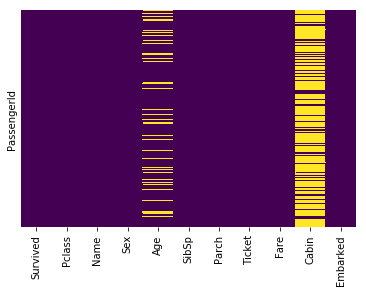

In [18]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

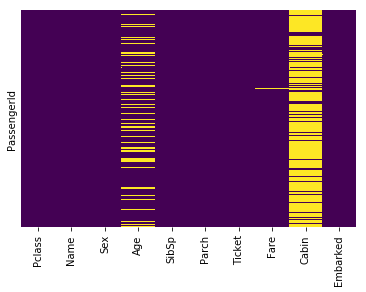

In [19]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

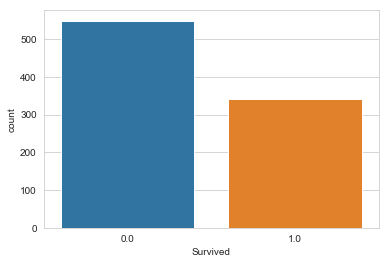

In [20]:
sns.set_style(style = 'whitegrid')
sns.countplot(x = 'Survived', data = data)

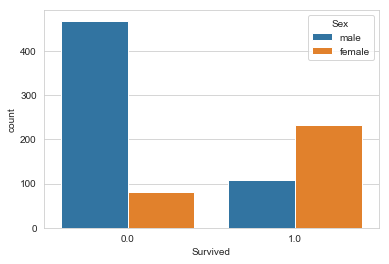

In [21]:
sns.set_style(style = 'whitegrid')
sns.countplot(x = 'Survived', data = data, hue = 'Sex')

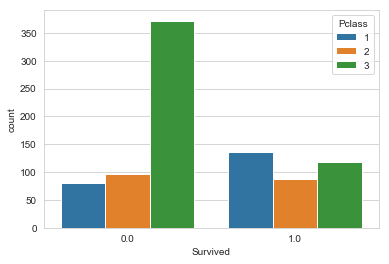

In [22]:
sns.set_style(style = 'whitegrid')
sns.countplot(x = 'Survived', data = data, hue = 'Pclass')

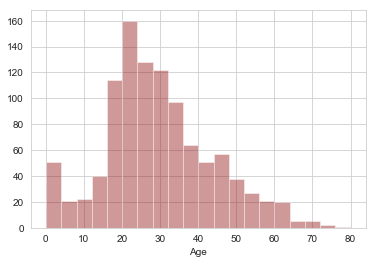

In [23]:
sns.distplot(data['Age'].dropna(), kde = False, color='darkred', bins = 20)

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


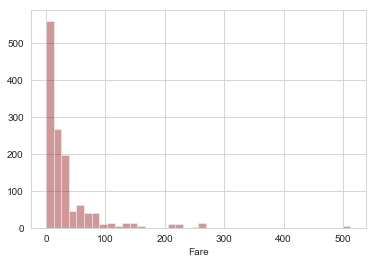

In [24]:
sns.distplot(data['Fare'], kde = False, color='darkred', bins = 40)

## Data Cleaning

As we have seen above that the column Age has  null values. Therefore we need to fill in these null values. One way to do this is by dropping the null values rows but that would incur in the loss of so much information, other way to do this is by filling the mean value of all the passengers. 

However we do have other option also where we will check the average age of the passengers wrt to their passenger_class.Let us see how.

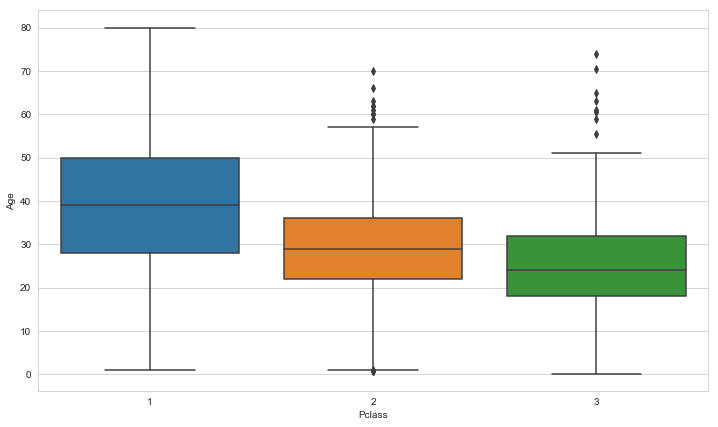

In [25]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = data )

We can see that the passenger in 1st class seems to older as compared to others as they can be wealthier, which makes sense.
We will take out average age of the passengers with respect to passenger class: For Pclass 1= 37, pclass 2= 29 and pclass 3 = 24

Now we will create a function using these average age values based on Pclass for age

In [26]:
def age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else: 
            return 24
        
        
    else: 
        return Age  

In [27]:
train['Age'] = train[['Age', 'Pclass']].apply(age, axis = 1)

Let us check the heatmap again

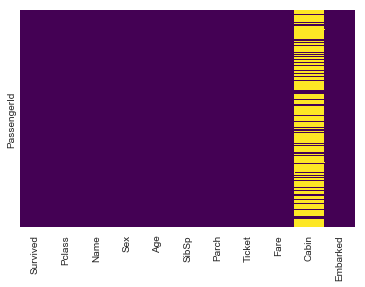

In [28]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [29]:
test['Age'] = test[['Age', 'Pclass']].apply(age, axis = 1)

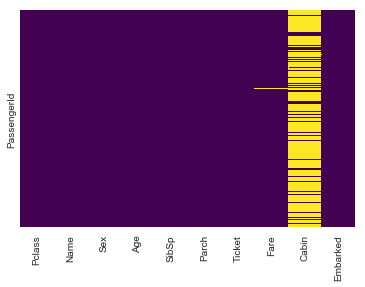

In [30]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Now since the column 'Cabin' have a lot of missing data. Hence we will drop this particular table

In [31]:
train.drop('Cabin', axis = 1,  inplace = True)

In [32]:
test.drop('Cabin', axis = 1,  inplace = True)

In [33]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


The dataset contains a single null value in the Embarked column hence we will drop that particular row

In [35]:
test.dropna(inplace = True)

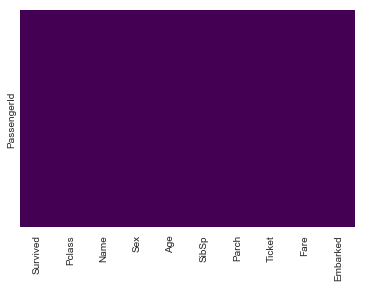

In [36]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Conversion of Categorical variables

We will now convert the categorical variables into dummy variables as ML models algorithms don't take those features as inputs.

The columns Sex and Embarked have categorical variables. Hence we will convert these into dummy variables.

In [37]:
train['sex'] = pd.get_dummies(train['Sex'], drop_first = True)
test['sex'] = pd.get_dummies(test['Sex'], drop_first = True)

In [38]:
test.head()#1:Male, 0:Female

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [39]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [40]:
train = pd.concat([train, embark], axis = 1)

In [41]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,Q,S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [42]:
embark1 = pd.get_dummies(test['Embarked'], drop_first = True)

In [43]:
test = pd.concat([test, embark1], axis = 1)

In [45]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex,Q,S
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


## Dropping all the unnecessary columns including Name and Ticket

In [46]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [47]:
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [48]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [49]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,sex,Q,S
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,0
893,3,47.0,1,0,7.0000,0,0,1
894,2,62.0,0,0,9.6875,1,1,0
895,3,27.0,0,0,8.6625,1,0,1
896,3,22.0,1,1,12.2875,0,0,1


## Correlation Matrix

In [50]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Q,S
Survived,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.081658,0.007763
SibSp,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
sex,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Q,0.003650,0.221009,-0.081658,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
S,-0.155660,0.081720,0.007763,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


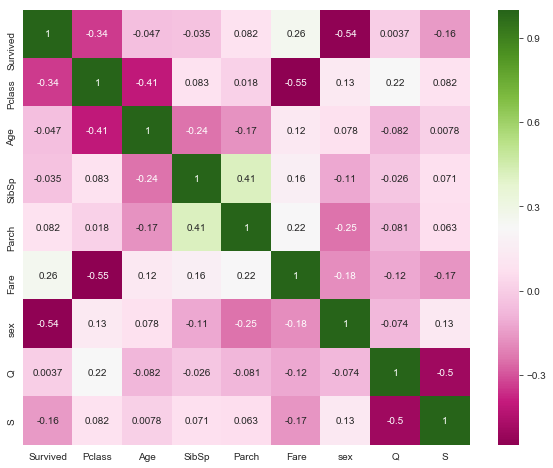

In [51]:
plt.subplots(figsize = (10,8))
sns.heatmap(train.corr(), annot = True, cmap = 'PiYG')

There is a positive correlation between Fare and Survived rated. This can be explained by saying that the passenger who paid more money for their tickets were more likely to survive.

# Building Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test

X_train.shape, Y_train.shape, X_test.shape


((891, 8), (891,), (417, 8))

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
prediction = logreg.predict(X_test)

In [56]:
acc_log = round(logreg.score(X_train, Y_train)* 100, 2)

In [57]:
acc_log

80.25